## 한글폰트

In [1]:
# 한글폰트 사용 in colab
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumBarunGothic


In [2]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 6.1 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 3.9 MB/s 
     |████████████████████████████████| 9.8 MB 28.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


## Step 0 데이터 수집 : Yahoo Finance 데이터 불러오기

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import yfinance as yf

sk_df = yf.download('096770.KS',
                      start='2021-05-05',
                      end='2021-11-05',
                      progress=False)

sk_df = sk_df[["Close"]]

sk_df = sk_df.reset_index()

sk_df.columns = ['day', 'price']

sk_df['day'] = pd.to_datetime(sk_df['day'])

sk_df.index = sk_df['day']
sk_df.set_index('day', inplace=True)

sk_df

,price
day,
2021-05-06,281500.0
2021-05-07,283500.0
2021-05-10,279000.0
2021-05-11,269000.0
2021-05-12,266500.0
...,...
2021-11-01,239500.0
2021-11-02,248500.0
2021-11-03,243500.0


## Step 1 탐색 : 시간정보가 포함된 데이터 살펴보기

In [5]:
sk_train_df = sk_df[:120]
sk_train_df

,price
day,
2021-05-06,281500.0
2021-05-07,283500.0
2021-05-10,279000.0
2021-05-11,269000.0
2021-05-12,266500.0
...,...
2021-10-25,256500.0
2021-10-26,257000.0
2021-10-27,251000.0


In [6]:
sk_test_df = sk_df[120:]
sk_test_df

,price
day,
2021-11-01,239500.0
2021-11-02,248500.0
2021-11-03,243500.0
2021-11-04,239500.0
2021-11-05,233500.0


### 시각화

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


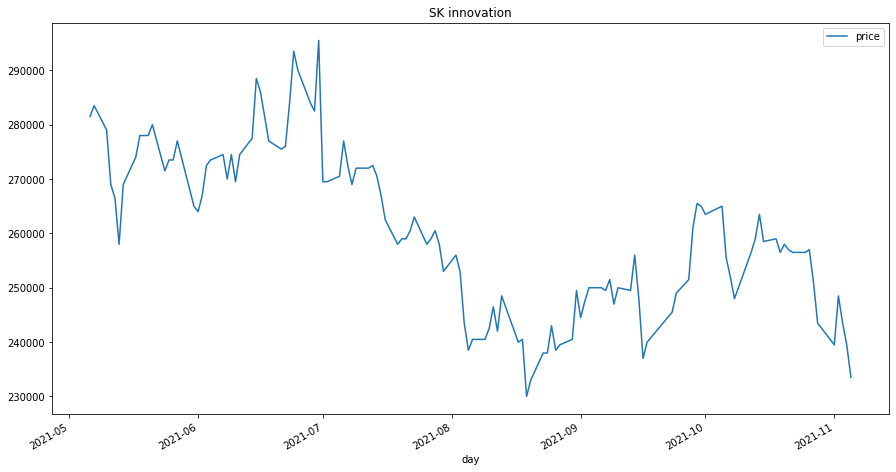

In [7]:
fig, ax = plt.subplots(figsize=(15, 8))
sk_df.plot(ax=ax)

plt.title("SK innovation")
plt.show()

## Step 2 예측 : 파이썬 라이브러리를 활용한 시세 예측

### Model 1 : ARIMA

In [8]:
pip install statsmodels==0.11.1 # 버전 다운그레이드 (0.11.1)

     |████████████████████████████████| 8.7 MB 3.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.1
    Uninstalling statsmodels-0.13.1:
      Successfully uninstalled statsmodels-0.13.1


In [ ]:
#방법 2. auto_arima 함수로 자동 추출
from pmdarima import auto_arima
stepwise_model = auto_arima(sk_train_df, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=7,
                           d=2, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(1,1,1)[7]             : AIC=2310.269, Time=0.68 sec
 ARIMA(0,2,0)(0,1,0)[7]             : AIC=2379.664, Time=0.02 sec
 ARIMA(1,2,0)(1,1,0)[7]             : AIC=2379.586, Time=0.13 sec
 ARIMA(0,2,1)(0,1,1)[7]             : AIC=inf, Time=0.32 sec
 ARIMA(1,2,1)(0,1,1)[7]             : AIC=inf, Time=0.59 sec
 ARIMA(1,2,1)(1,1,0)[7]             : AIC=inf, Time=0.76 sec
 ARIMA(1,2,1)(2,1,1)[7]             : AIC=2312.253, Time=2.13 sec
 ARIMA(1,2,1)(1,1,2)[7]             : AIC=inf, Time=1.51 sec
 ARIMA(1,2,1)(0,1,0)[7]             : AIC=inf, Time=0.20 sec
 ARIMA(1,2,1)(0,1,2)[7]             : AIC=2314.922, Time=1.17 sec
 ARIMA(1,2,1)(2,1,0)[7]             : AIC=inf, Time=0.96 sec
 ARIMA(1,2,1)(2,1,2)[7]             : AIC=inf, Time=2.37 sec
 ARIMA(0,2,1)(1,1,1)[7]             : AIC=2311.028, Time=0.52 sec
 ARIMA(1,2,0)(1,1,1)[7]             : AIC=inf, Time=0.68 sec
 ARIMA(2,2,1)(1,1,1)[7]             : AIC=inf, Time=0.85 sec
 ARIMA(1,2,2

In [9]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# AR, 차분, MA 파라미터로 ARIMA 모델을 학습한다.
model = ARIMA(sk_train_df.price.values, order = (0,2,1))
model_fit = model.fit(trend = 'nc', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                  118
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -1184.800
Method:                       css-mle   S.D. of innovations           5439.779
Date:                Mon, 29 Nov 2021   AIC                           2373.600
Time:                        02:36:22   BIC                           2379.141
Sample:                             2   HQIC                          2375.850
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.D2.y    -1.0000      0.023    -43.170      0.000      -1.045      -0.955
                                    Roots                                    
                  Real          Imaginary           M

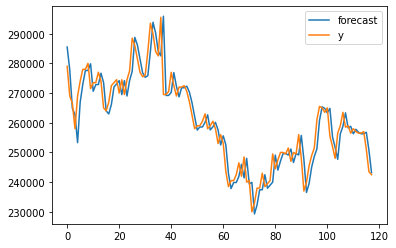

In [10]:
# 학습 데이터에 대한 예측 결과

fig = model_fit.plot_predict()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_

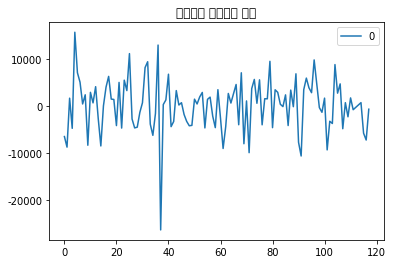

In [11]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(title = "실제값과 예측값의 잔차")

In [12]:
forecast_data = model_fit.forecast(steps=5) 

In [13]:
# 마지막 5일의 예측 데이터
pred_arima_y = forecast_data[0].tolist()

# 실제 5일의 데이터
test_y = sk_test_df.price.values

# 마지막 5일의 예측 데이터 최소값
pred_y_lower = []
# 마지막 5일의 예측 데이터 최대값
pred_y_upper = []

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

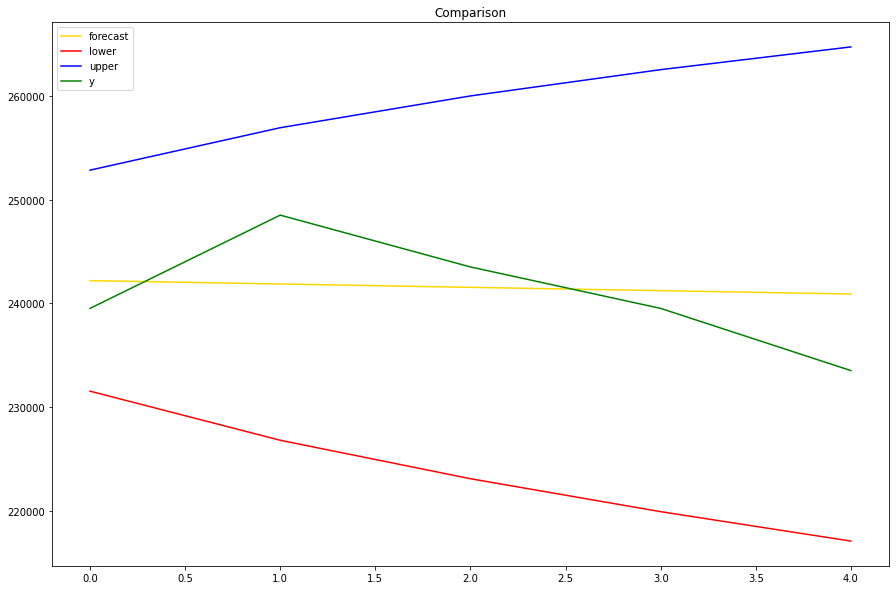

In [14]:
plt.figure(figsize=(15, 10))

# 모델이 예측한 가격 그래프
plt.plot(pred_arima_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['forecast', 'lower','upper','y'])
plt.title("Comparison")
plt.show()

## Model 2 : Facebook Prophet

In [15]:
from fbprophet import Prophet


sk_df = sk_df.reset_index()

sk_df.columns = ['ds', 'y']

sk_train_df = sk_df[:120]
sk_test_df = sk_df[120:]

In [16]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True, 
                 weekly_seasonality=False,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.01)

prophet.fit(sk_train_df)

In [17]:
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
120,2021-10-30,250478.952467,243761.030974,256447.949122
121,2021-10-31,250398.450584,243995.506401,257343.449681
122,2021-11-01,250349.016788,243927.519329,257413.239410
123,2021-11-02,250311.424627,243752.743059,256896.367658
124,2021-11-03,250264.776054,244071.916018,256915.176619


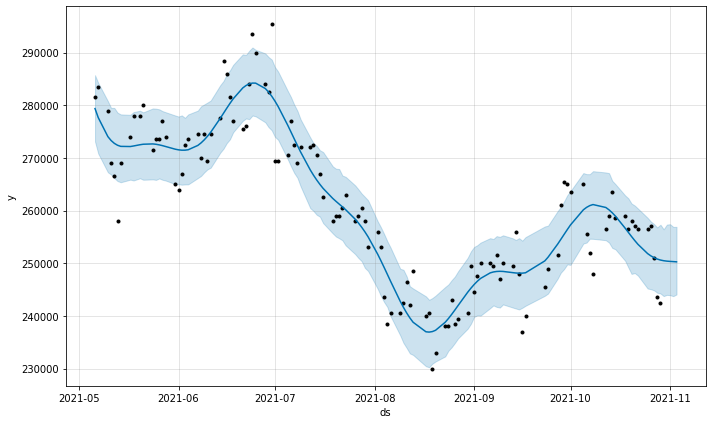

In [18]:
fig1 = prophet.plot(forecast_data)

# 검은 점 : 실제 가격.
# 파란 선 : 예측 가격.

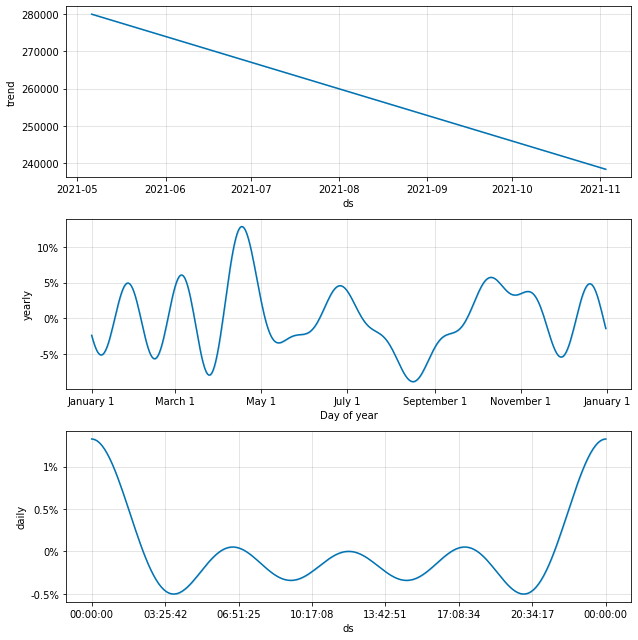

In [19]:
# 트렌드 정보 시각화 그래프.
fig2 = prophet.plot_components(forecast_data)

Text(0.5, 1.0, 'Comparison')

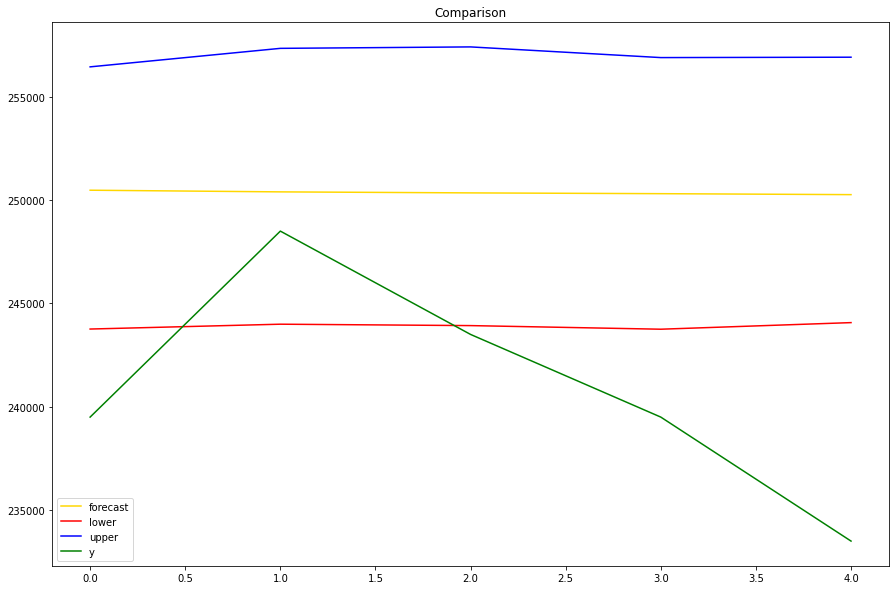

In [20]:
# Testset 평가
plt.figure(figsize=(15, 10))

# 마지막 5일의 예측 데이터
pred_fbprophet_y = forecast_data.yhat.values[-5:]

# 실제 5일의 데이터
test_y = sk_test_df.y.values

# 마지막 5일의 예측 데이터 최소값
pred_y_lower = forecast_data.yhat_lower.values[-5:]
# 마지막 5일의 예측 데이터 최대값
pred_y_upper = forecast_data.yhat_upper.values[-5:]

# 모델이 예측한 가격 그래프
plt.plot(pred_fbprophet_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.legend(['forecast', 'lower','upper','y'])
plt.title("Comparison")

In [21]:
df = pd.DataFrame({'ARIMA 예측값':pred_arima_y,
                   'FBprophet 예측값':  pred_fbprophet_y,
                   '실제값':test_y})

Text(0.5, 1.0, 'Loss Comparison')

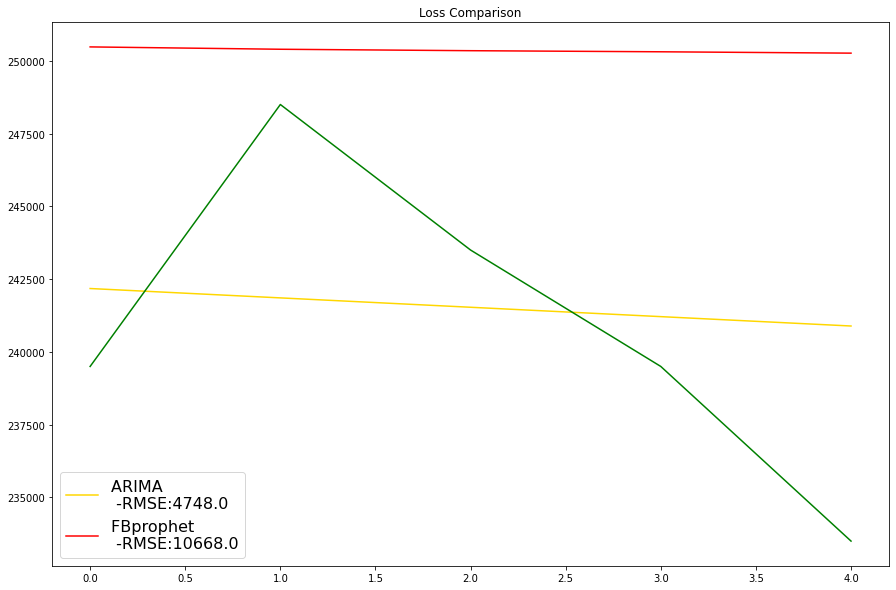

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

plt.figure(figsize=(15, 10))

# arima 모델의  rmse
rmse_arima = sqrt(mean_squared_error(pred_arima_y, test_y))

# fbprophet 모델의  rmse
rmse_fbprophet = sqrt(mean_squared_error(pred_fbprophet_y, test_y))

# 모델이 예측한 가격 그래프
plt.plot(df[['ARIMA 예측값']], color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(df[['FBprophet 예측값']], color = 'red')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

plt.rc('legend', fontsize=16)
plt.legend(['ARIMA \n -RMSE:' + str(round(rmse_arima,0)), 
            'FBprophet  \n -RMSE:' + str(round(rmse_fbprophet,0))])
plt.title("Loss Comparison")

In [ ]:
df = pd.DataFrame({'ARIMA 예측값':pred_arima_y,
                   'FBprophet 예측값':  pred_fbprophet_y,
                   '실제값':test_y})

df

,ARIMA 예측값,FBprophet 예측값,실제값
0,242177.957870,250478.952467,239500.0
1,241855.915739,250398.450584,248500.0
2,241533.873609,250349.016788,243500.0
3,241211.831479,250311.424627,239500.0
4,240889.789348,250264.776054,233500.0


## Step 3 활용 : 더 나은 결과를 위한 방법

### 첫 번째 : 상한값, 하한값을 지정.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



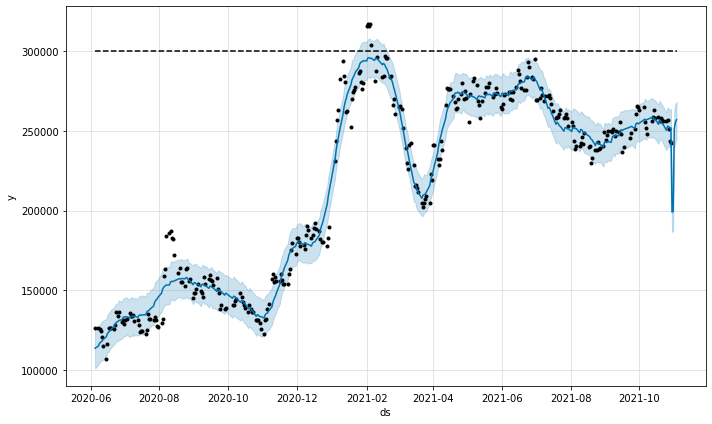

In [ ]:
# 상한가 설정
sk_train_df['cap'] = 300000

# 상한가 적용을 위한 파라미터를 다음과 같이 설정
prophet = Prophet(seasonality_mode = 'multiplicative',
                 growth = 'logistic',
                 yearly_seasonality = True,
                 weekly_seasonality = True, 
                 daily_seasonality = True,
                 changepoint_prior_scale = 0.5)

prophet.fit(sk_train_df)

# 5일 예측 
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')

# 상한가 설정
future_data['cap'] = 300000
forecast_data = prophet.predict(future_data)

fig = prophet.plot(forecast_data)

### 두 번째 : 이상치 제거

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



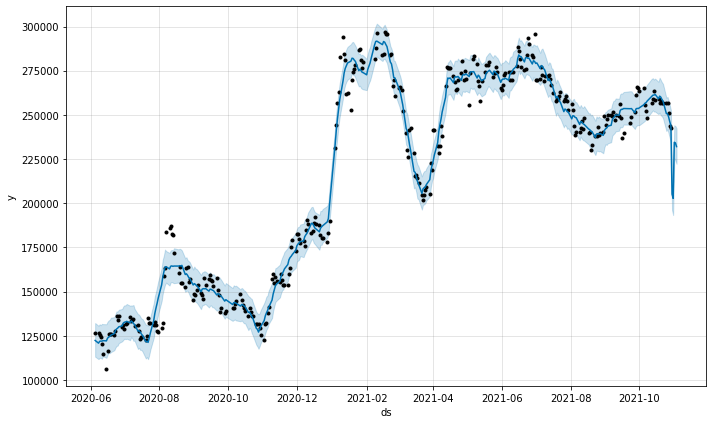

In [ ]:
sk_train_df.loc[sk_train_df['y'] > 300000, 'y'] = None

# prophet 모델 학습
prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality = True,
                 weekly_seasonality = True,
                 daily_seasonality = True,
                 changepoint_prior_scale = 0.5)

prophet.fit(sk_train_df)

# 5일 예측 
future_data = prophet.make_future_dataframe(periods = 5, freq = 'd')

forecast_data = prophet.predict(future_data)

fig = prophet.plot(forecast_data)

In [ ]:
pred_fbprophet_y_1 = forecast_data.yhat.values[-5:]

## Step 4 : Model 평가

### RMSE (Root Mean Square Error, 평균 제곱근 오차)

In [ ]:
df = pd.DataFrame({'ARIMA 예측값':pred_arima_y,
                   'FBprophet 예측값':  pred_fbprophet_y,
                   'FBprophet 이상치 제거 후(300000) 예측값':pred_fbprophet_y_1,
                   '실제값':test_y})

Text(0.5, 1.0, '값 비교')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44050 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48708 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44368 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 44050 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 48708 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 44368 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50696 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

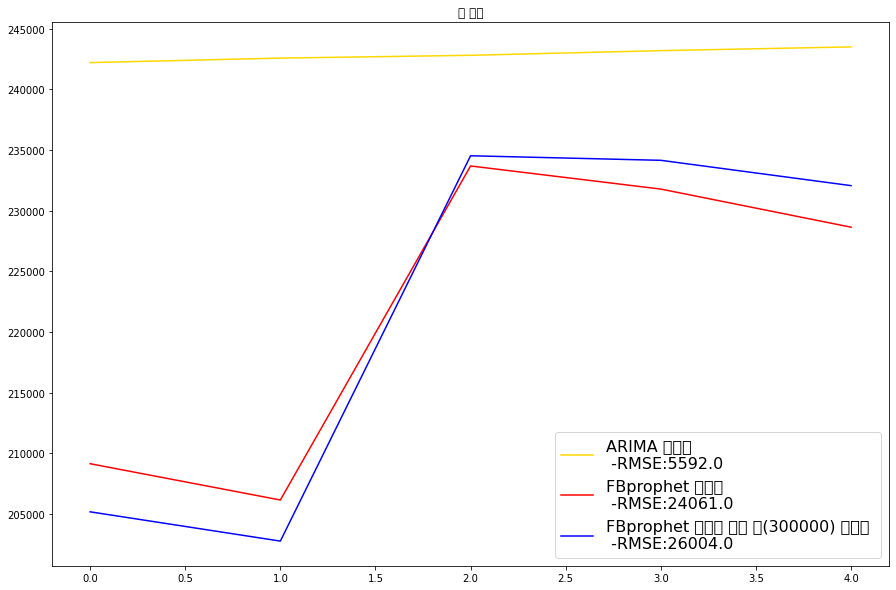

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

plt.figure(figsize=(15, 10))

# arima 모델의  rmse
rmse_arima = sqrt(mean_squared_error(pred_arima_y, test_y))

# fbprophet 모델의  rmse
rmse_fbprophet = sqrt(mean_squared_error(pred_fbprophet_y, test_y))

# 전처리 진행한 fbprophet 모델의  rmse
rmse_fbprophet_1 = sqrt(mean_squared_error(pred_fbprophet_y_1, test_y))

# 모델이 예측한 가격 그래프
plt.plot(df[['ARIMA 예측값']], color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(df[['FBprophet 예측값']], color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(df[['FBprophet 이상치 제거 후(300000) 예측값']], color = 'blue')

# 실제 가격 그래프
# plt.plot(test_y, color = 'green')

plt.rc('legend', fontsize=16)
plt.legend(['ARIMA 예측값 \n -RMSE:' + str(round(rmse_arima,0)), 
            'FBprophet 예측값  \n -RMSE:' + str(round(rmse_fbprophet,0)),
            'FBprophet 이상치 제거 후(300000) 예측값 \n -RMSE:' + str(round(rmse_fbprophet_1,0))])
plt.title("값 비교")